<a href="https://colab.research.google.com/github/JoelForson/ECON5200-Applied-Data-Analytics-in-Economics/blob/main/Lab%203/%7BLab_3%5D_Visualizing_Development_with_WBGAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
!pip install wbgapi

In [53]:
import wbgapi as wb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define Economies: GHA (Ghana), UMC (Upper Middle Income), WLD (World)
country_codes = ['GHA', 'LMC', 'WLD']

indicators = {
    'NY.GDP.PCAP.KD': 'GDP_Per_Capita_Const',     # Standard of Living
    'SL.TLF.CACT.ZS': 'Labor_Part_Rate',          # Labor Supply
    'SL.UEM.TOTL.ZS': 'Unemployment_Rate',        # Labor Friction
    'SL.TLF.TOTL.IN': 'Labor_Force_Total',        # Total Workers
    'NY.GDP.MKTP.KD': 'GDP_Const',                # Economic Size
    'FP.CPI.TOTL.ZG': 'Inflation_CPI',            # Stability
    'NY.GDS.TOTL.ZS': 'Gross_Dom_Savings',        # Savings
    'NE.GDI.TOTL.ZS': 'Gross_Cap_Formation',      # Investment
    'NE.EXP.GNFS.ZS': 'Exports_GDP',              # Exports
    'NE.IMP.GNFS.ZS': 'Imports_GDP',              # Imports
    'GC.TAX.TOTL.GD.ZS': 'Tax_Rev_GDP',           # Gov Revenue
    'NE.CON.GOVT.ZS': 'Gov_Exp_GDP'               # Gov Spending
}

In [54]:
# 1. Fetch Data
print("Fetching data...")
df_raw = wb.data.DataFrame(indicators, economy=country_codes, time=range(1970, 2025))

# 2. Transpose (Flip Rows/Cols)
df = df_raw.T

# 3. Clean Index
df.index = df.index.str.replace('YR', '').astype(int)
df.index.name = 'Year'
df = df.sort_index()

# 4. Rename Columns
df.rename(columns=indicators, level=1, inplace=True)

# 5. Extract Ghana for specific calculations
df_gha = df.xs('GHA', axis=1, level=0).copy()

Fetching data...


In [55]:
df_gha.head()

series,Inflation_CPI,Tax_Rev_GDP,Gov_Exp_GDP,Exports_GDP,Gross_Cap_Formation,Imports_GDP,GDP_Const,GDP_Per_Capita_Const,Gross_Dom_Savings,Labor_Part_Rate,Labor_Force_Total,Unemployment_Rate
Year,,,,,,,,,,,,
1970,3.030303,NaN,12.837539,21.336875,14.165560,22.709163,1.028300e+10,1152.051767,12.793271,NaN,NaN,NaN
1971,9.558824,NaN,12.960000,15.760000,14.120000,20.240000,1.081937e+10,1179.060744,9.640000,NaN,NaN,NaN
1972,10.067114,NaN,12.611012,20.710480,7.104796,15.204263,1.055022e+10,1117.823153,12.575488,NaN,NaN,NaN
1973,17.682927,NaN,10.911168,21.451014,9.025993,16.395316,1.085455e+10,1117.342458,14.081691,NaN,NaN,NaN
1974,18.134715,NaN,12.210300,18.326180,13.047210,21.802575,1.159836e+10,1159.775762,9.570815,NaN,NaN,NaN


In [56]:
# Further Calculations

# 1. Natural Rate of Unemployment (5-Year MA)
df_gha['Natural_Rate_Unemp'] = df_gha['Unemployment_Rate'].rolling(window=5).mean()

# 2. Productivity (Output per Worker)
df_gha['Productivity'] = df_gha['GDP_Const'] / df_gha['Labor_Force_Total']

# 3. Net Capital Outflow (Exports - Imports)
df_gha['NCO'] = df_gha['Exports_GDP'] - df_gha['Imports_GDP']

# 4. Budget Balance (Tax - Spending)
df_gha['Budget_Balance'] = df_gha['Tax_Rev_GDP'] - df_gha['Gov_Exp_GDP']

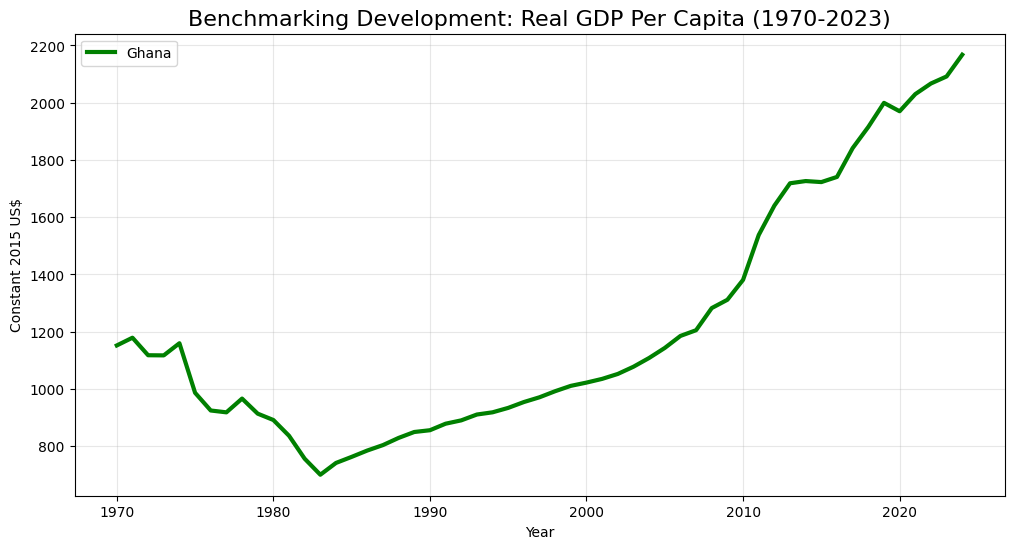

In [57]:
# Introductory Vizualizations

plt.figure(figsize=(12, 6))
# Plot ONLY Ghana
plt.plot(df.index, df[('GHA', 'GDP_Per_Capita_Const')], label='Ghana', color='Green', linewidth=3)
plt.title('Benchmarking Development: Real GDP Per Capita (1970-2023)', fontsize=16)
plt.ylabel('Constant 2015 US$')
plt.xlabel('Year')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

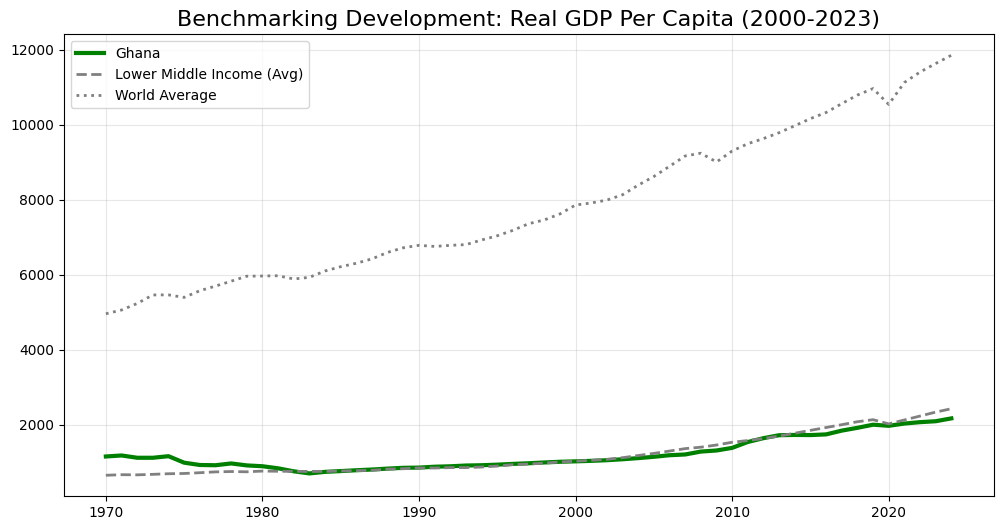

In [58]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[('GHA', 'GDP_Per_Capita_Const')], label='Ghana', color='Green', linewidth=3)
# ADD THESE LINES
plt.plot(df.index, df[('LMC', 'GDP_Per_Capita_Const')], label='Lower Middle Income (Avg)', color='grey', linestyle='--', linewidth=2)
plt.plot(df.index, df[('WLD', 'GDP_Per_Capita_Const')], label='World Average', color='grey', linestyle=':', linewidth=2)

plt.title('Benchmarking Development: Real GDP Per Capita (2000-2023)', fontsize=16)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

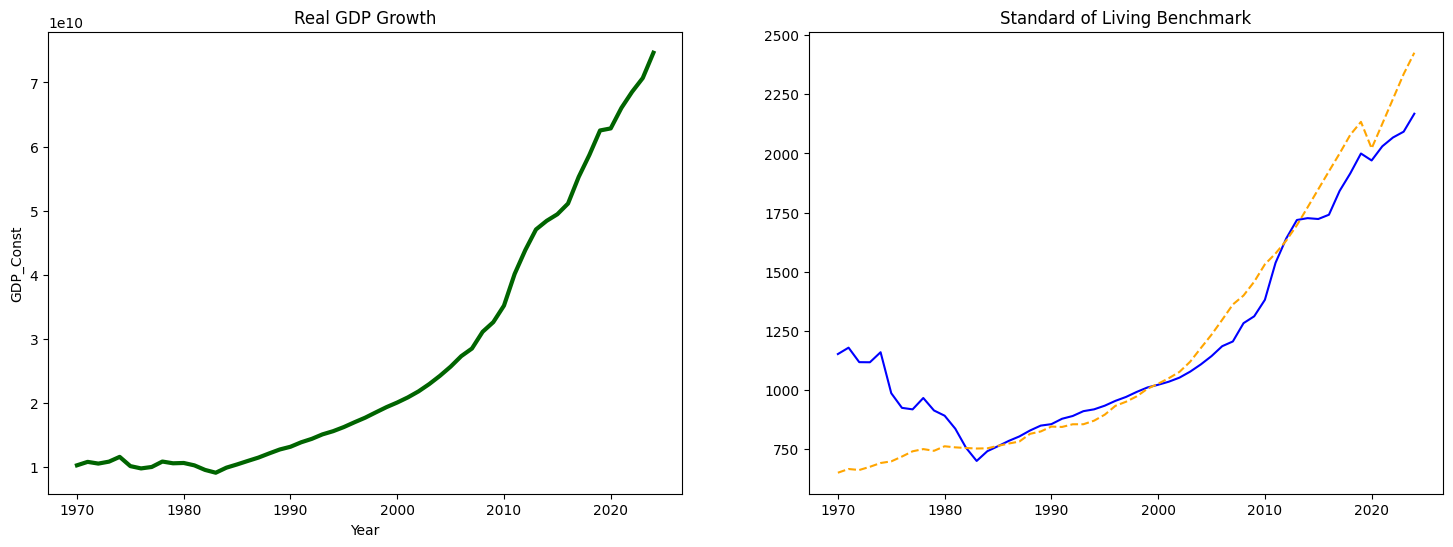

In [59]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Chart A: Total GDP
sns.lineplot(data=df_gha, x=df_gha.index, y='GDP_Const', color='darkgreen', linewidth=3, ax=ax1)
ax1.set_title('Real GDP Growth')

# Chart B: GDP Per Capita Benchmark
ax2.plot(df.index, df[('GHA', 'GDP_Per_Capita_Const')], color='blue')
ax2.plot(df.index, df[('LMC', 'GDP_Per_Capita_Const')], color='orange', linestyle='--')
ax2.set_title('Standard of Living Benchmark')
plt.show()

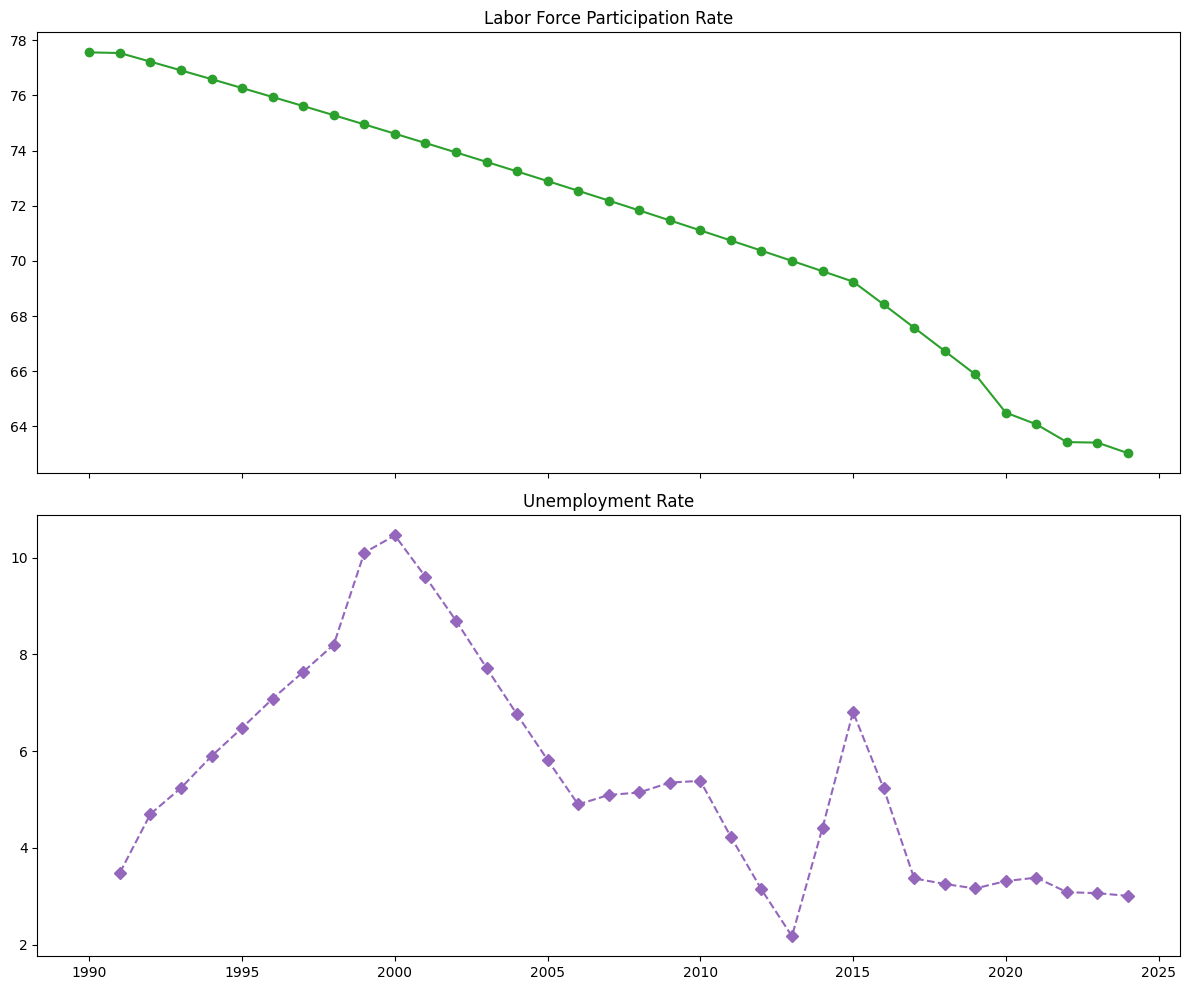

In [60]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Top: Participation
ax1.plot(df_gha.index, df_gha['Labor_Part_Rate'], color='tab:green', marker='o')
ax1.set_title('Labor Force Participation Rate')

# Bottom: Unemployment
ax2.plot(df_gha.index, df_gha['Unemployment_Rate'], color='tab:purple', marker='D', linestyle='--')
ax2.set_title('Unemployment Rate')
plt.tight_layout()
plt.show()

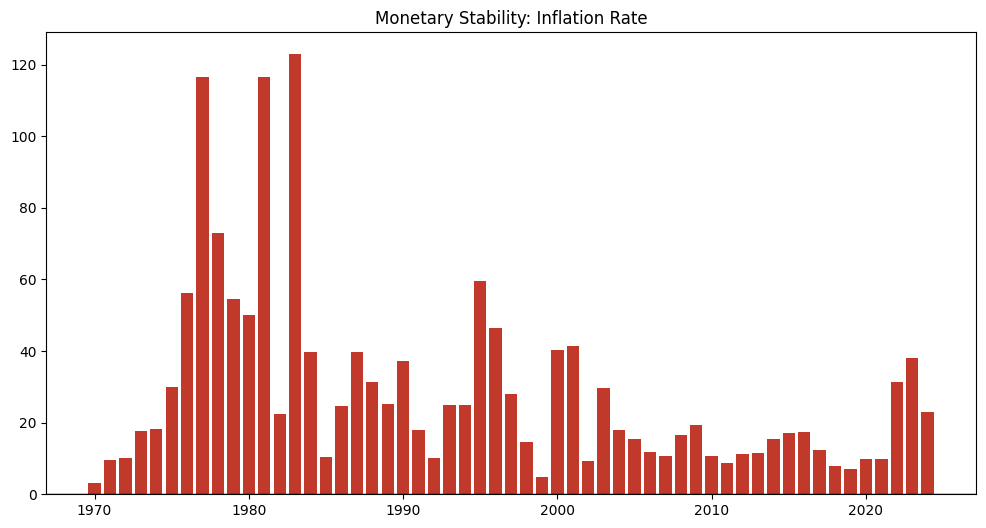

In [61]:
plt.figure(figsize=(12, 6))

plt.bar(df_gha.index, df_gha['Inflation_CPI'], color='#c0392b')

plt.axhline(0, color='black', linewidth=1)
plt.title('Monetary Stability: Inflation Rate')
plt.show()

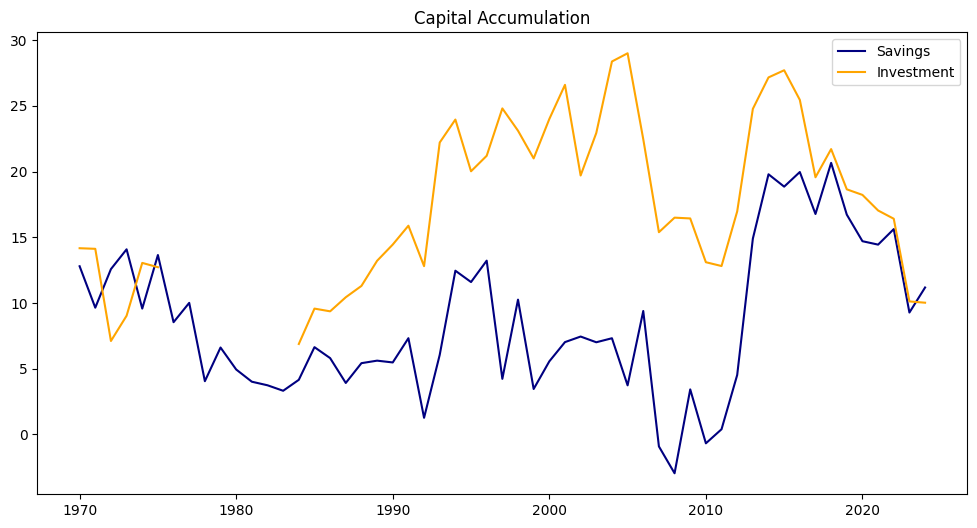

In [62]:
plt.figure(figsize=(12, 6))
plt.plot(df_gha.index, df_gha['Gross_Dom_Savings'], label='Savings', color='navy')
plt.plot(df_gha.index, df_gha['Gross_Cap_Formation'], label='Investment', color='orange')
plt.title('Capital Accumulation')
plt.legend()
plt.show()

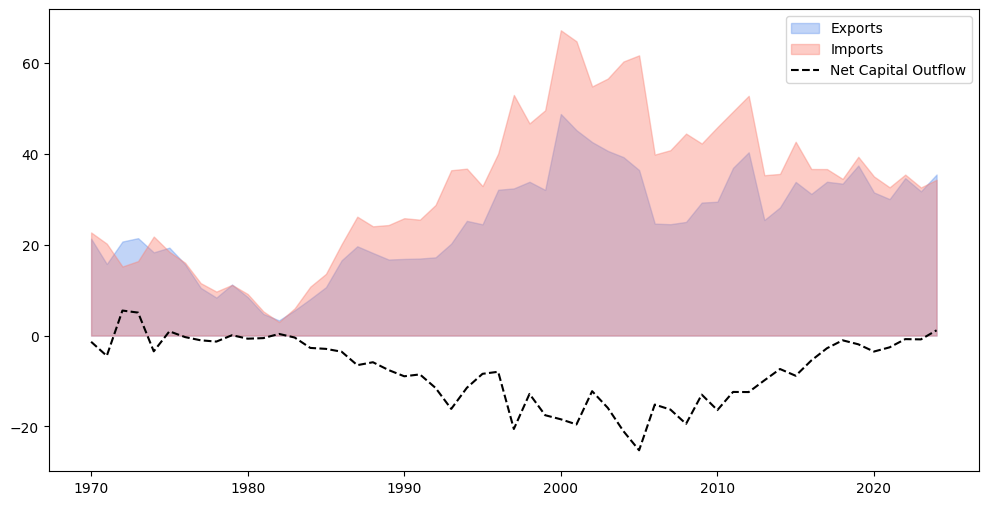

In [63]:
plt.figure(figsize=(12, 6))
plt.fill_between(df_gha.index, df_gha['Exports_GDP'], color='cornflowerblue', alpha=0.4, label='Exports')
plt.fill_between(df_gha.index, df_gha['Imports_GDP'], color='salmon', alpha=0.4, label='Imports')
plt.plot(df_gha.index, df_gha['NCO'], color='black', linestyle='--', label='Net Capital Outflow')
plt.legend()
plt.show()

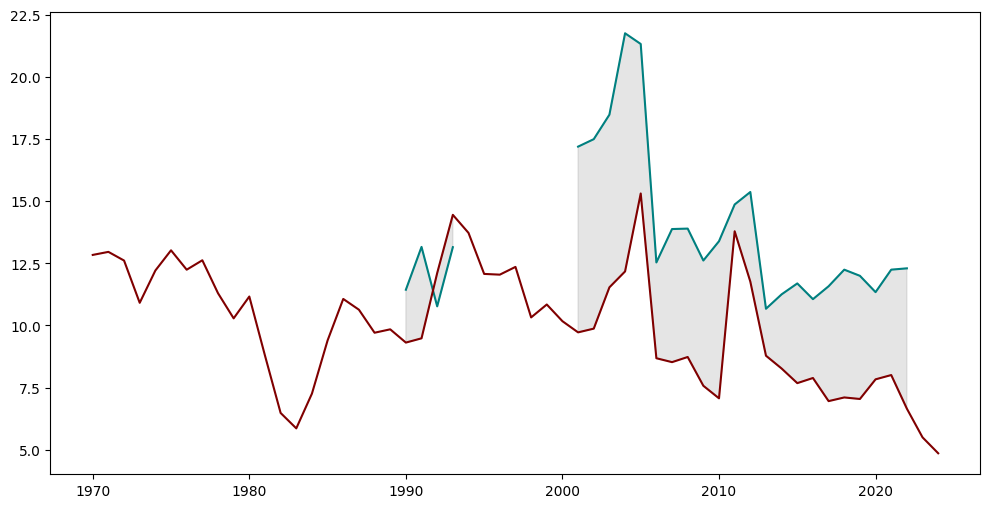

In [64]:
plt.figure(figsize=(12, 6))
plt.plot(df_gha.index, df_gha['Tax_Rev_GDP'], label='Revenue', color='teal')
plt.plot(df_gha.index, df_gha['Gov_Exp_GDP'], label='Expenditure', color='maroon')
plt.fill_between(df_gha.index, df_gha['Tax_Rev_GDP'], df_gha['Gov_Exp_GDP'], color='gray', alpha=0.2)
plt.show()


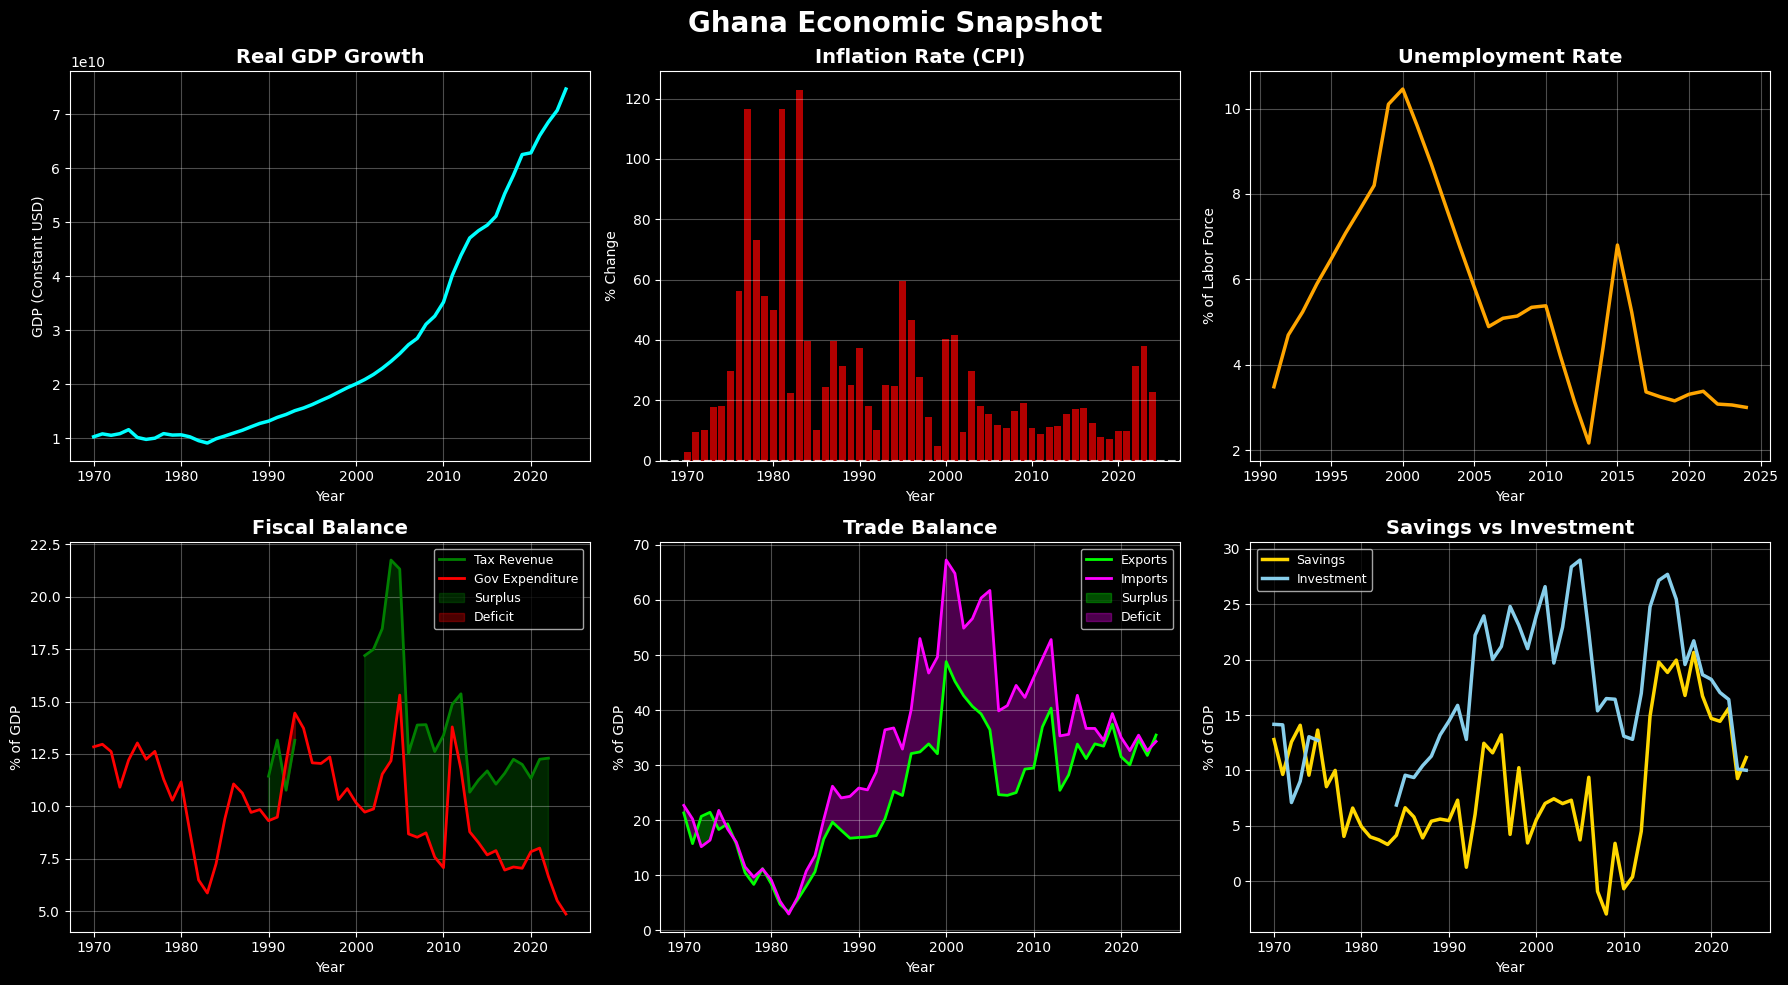

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set dark background style
plt.style.use('dark_background')

# Create 2x3 subplot grid
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Main title
fig.suptitle('Ghana Economic Snapshot', fontsize=20, fontweight='bold', y=0.98)

# ============ TOP LEFT: Real GDP ============
ax1 = axes[0, 0]
ax1.plot(df_gha.index, df_gha['GDP_Const'], color='cyan', linewidth=2.5)
ax1.set_title('Real GDP Growth', fontsize=14, fontweight='bold')
ax1.set_xlabel('Year', fontsize=10)
ax1.set_ylabel('GDP (Constant USD)', fontsize=10)
ax1.grid(True, alpha=0.3)

# ============ TOP MIDDLE: Inflation Rate ============
ax2 = axes[0, 1]
colors = ['red' if x > 0 else 'green' for x in df_gha['Inflation_CPI']]
ax2.bar(df_gha.index, df_gha['Inflation_CPI'], color=colors, alpha=0.7)
ax2.axhline(y=0, color='white', linestyle='--', linewidth=1.5, alpha=0.8)
ax2.set_title('Inflation Rate (CPI)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Year', fontsize=10)
ax2.set_ylabel('% Change', fontsize=10)
ax2.grid(True, alpha=0.3, axis='y')

# ============ TOP RIGHT: Unemployment Rate ============
ax3 = axes[0, 2]
ax3.plot(df_gha.index, df_gha['Unemployment_Rate'], color='orange', linewidth=2.5)
ax3.set_title('Unemployment Rate', fontsize=14, fontweight='bold')
ax3.set_xlabel('Year', fontsize=10)
ax3.set_ylabel('% of Labor Force', fontsize=10)
ax3.grid(True, alpha=0.3)

# ============ BOTTOM LEFT: Fiscal Balance ============
ax4 = axes[1, 0]
ax4.plot(df_gha.index, df_gha['Tax_Rev_GDP'], color='green', linewidth=2, label='Tax Revenue')
ax4.plot(df_gha.index, df_gha['Gov_Exp_GDP'], color='red', linewidth=2, label='Gov Expenditure')
ax4.fill_between(df_gha.index, df_gha['Tax_Rev_GDP'], df_gha['Gov_Exp_GDP'],
                  where=(df_gha['Tax_Rev_GDP'] >= df_gha['Gov_Exp_GDP']),
                  color='green', alpha=0.3, interpolate=True, label='Surplus')
ax4.fill_between(df_gha.index, df_gha['Tax_Rev_GDP'], df_gha['Gov_Exp_GDP'],
                  where=(df_gha['Tax_Rev_GDP'] < df_gha['Gov_Exp_GDP']),
                  color='red', alpha=0.3, interpolate=True, label='Deficit')
ax4.set_title('Fiscal Balance', fontsize=14, fontweight='bold')
ax4.set_xlabel('Year', fontsize=10)
ax4.set_ylabel('% of GDP', fontsize=10)
ax4.legend(loc='best', fontsize=9)
ax4.grid(True, alpha=0.3)

# ============ BOTTOM MIDDLE: Trade Balance ============
ax5 = axes[1, 1]
ax5.plot(df_gha.index, df_gha['Exports_GDP'], color='lime', linewidth=2, label='Exports')
ax5.plot(df_gha.index, df_gha['Imports_GDP'], color='magenta', linewidth=2, label='Imports')
ax5.fill_between(df_gha.index, df_gha['Exports_GDP'], df_gha['Imports_GDP'],
                  where=(df_gha['Exports_GDP'] >= df_gha['Imports_GDP']),
                  color='lime', alpha=0.3, interpolate=True, label='Surplus')
ax5.fill_between(df_gha.index, df_gha['Exports_GDP'], df_gha['Imports_GDP'],
                  where=(df_gha['Exports_GDP'] < df_gha['Imports_GDP']),
                  color='magenta', alpha=0.3, interpolate=True, label='Deficit')
ax5.set_title('Trade Balance', fontsize=14, fontweight='bold')
ax5.set_xlabel('Year', fontsize=10)
ax5.set_ylabel('% of GDP', fontsize=10)
ax5.legend(loc='best', fontsize=9)
ax5.grid(True, alpha=0.3)

# ============ BOTTOM RIGHT: Savings vs Investment ============
ax6 = axes[1, 2]
ax6.plot(df_gha.index, df_gha['Gross_Dom_Savings'], color='gold', linewidth=2.5, label='Savings')
ax6.plot(df_gha.index, df_gha['Gross_Cap_Formation'], color='skyblue', linewidth=2.5, label='Investment')
ax6.set_title('Savings vs Investment', fontsize=14, fontweight='bold')
ax6.set_xlabel('Year', fontsize=10)
ax6.set_ylabel('% of GDP', fontsize=10)
ax6.legend(loc='best', fontsize=9)
ax6.grid(True, alpha=0.3)

# Adjust layout
plt.tight_layout()

# Display
plt.show()